In [3]:
import pandas as pd

time_df = pd.read_excel('/content/worker_all.xlsx')
time_df

,Unnamed: 0,exp,time,cargo,seq,acc,기인물,형태별
0,0,10,17-22시,철재,야적,1,작업대,협착
1,1,3,7~12시,양곡,야적,0,NaN,NaN
2,2,1,03~07시,컨테이너,기타,0,NaN,NaN
3,3,1,17~22시,잡화,기타,0,NaN,NaN
4,4,1,03~07시,상자물,입출고,0,NaN,NaN
...,...,...,...,...,...,...,...,...
20534,20534,10,12~17시,철재,입출고,0,NaN,NaN
20535,20535,0,22~03시,철재,선측,0,NaN,NaN
20536,20536,10,12~17시,펄프,상하차,0,NaN,NaN
20537,20537,5,7~12시,철재,기타,0,NaN,NaN


In [4]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20539 entries, 0 to 20538
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20539 non-null  int64 
 1   exp         20539 non-null  int64 
 2   time        20539 non-null  object
 3   cargo       20539 non-null  object
 4   seq         20539 non-null  object
 5   acc         20539 non-null  int64 
 6   기인물         539 non-null    object
 7   형태별         539 non-null    object
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [5]:
time_df = time_df.drop(['기인물','형태별','Unnamed: 0'], axis=1)

time_df

In [6]:
import pandas as pd

time_df["time"] = time_df["time"].astype("category")
time_df["time"] = time_df["time"].cat.codes

time_df["cargo"] = time_df["cargo"].astype("category")
time_df["cargo"] = time_df["cargo"].cat.codes

time_df["seq"] = time_df["seq"].astype("category")
time_df["seq"] = time_df["seq"].cat.codes
time_df

,Unnamed: 0,exp,time,cargo,seq,acc
0,0,10,4,7,4,1
1,1,3,9,4,4,0
2,2,1,1,8,0,0
3,3,1,5,6,0,0
4,4,1,1,3,6,0
...,...,...,...,...,...,...
20534,20534,10,3,7,6,0
20535,20535,0,7,7,3,0
20536,20536,10,3,9,1,0
20537,20537,5,9,7,0,0


In [9]:
from sklearn.model_selection import train_test_split

X = time_df[['exp', 'cargo', 'time','seq',]]
# 타겟 변수 설정
y = time_df['acc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16431, 4)
(4108, 4)
(16431,)
(4108,)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [ ]:
#평가
def get_clf_eval(y_test, pred):
    confusion=confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred, average='weighted')
    recall=recall_score(y_test, pred, average='weighted')
    f1=f1_score(y_test, pred, average='weighted')
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')

#학습
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

In [ ]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier

#학습, 평가
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
print('====== 의사결정나무 =======\n')
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

====== 의사결정나무 =======

오차 행렬
[[4006    0]
 [  15   87]]
정확도: 0.9963, 정밀도: 0.9964, 재현율: 0.9963, F1: 0.9962


In [ ]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=25, random_state=156)
dt_clf.fit(X_train, y_train)
print('====== 의사결정나무(노드데이터제한) =======\n')
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

====== 의사결정나무(노드데이터제한) =======

오차 행렬
[[4002    4]
 [  74   28]]
정확도: 0.9810, 정밀도: 0.9792, 재현율: 0.9810, F1: 0.9761


In [ ]:
dt_clf=DecisionTreeClassifier(max_depth=2, random_state=156)
dt_clf.fit(X_train, y_train)
print('====== 의사결정나무(최대깊이제한) =======\n')
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

====== 의사결정나무(최대깊이제한) =======

오차 행렬
[[ 0  0 18  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0 59  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  4  0  0  0  0]]
정확도: 0.5463, 정밀도: 0.2984, 재현율: 0.5463, F1: 0.3860


In [ ]:
from lightgbm import LGBMClassifier

#학습, 평가
lgbm_clf=LGBMClassifier(n_estimators=100, num_leaves=16,
                       n_jobs=-1, boost_from_average=False)
print('====== LGBM =======\n')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

====== LGBM =======

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 431, number of used features: 5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [12]:
#Xg
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train, y_train)))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

TypeError: ignored

# 이 아래부터 쓸만한 거

In [17]:
xgb_clf = XGBClassifier(n_estimators=50, learning_rate=0.05, random_state=156)

xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.88070	validation_1-auc:0.84563
[1]	validation_0-auc:0.88134	validation_1-auc:0.84685
[2]	validation_0-auc:0.89410	validation_1-auc:0.85810
[3]	validation_0-auc:0.89448	validation_1-auc:0.85878
[4]	validation_0-auc:0.89775	validation_1-auc:0.86103
[5]	validation_0-auc:0.89951	validation_1-auc:0.86181
[6]	validation_0-auc:0.90015	validation_1-auc:0.86174
[7]	validation_0-auc:0.90231	validation_1-auc:0.86496
[8]	validation_0-auc:0.90854	validation_1-auc:0.87044
[9]	validation_0-auc:0.91101	validation_1-auc:0.87281
[10]	validation_0-auc:0.91189	validation_1-auc:0.87535
[11]	validation_0-auc:0.91312	validation_1-auc:0.87670
[12]	validation_0-auc:0.91684	validation_1-auc:0.88140
[13]	validation_0-auc:0.92510	validation_1-auc:0.89138
[14]	validation_0-auc:0.92933	validation_1-auc:0.89414
[15]	validation_0-auc:0.93316	validation_1-auc:0.89772
[16]	validation_0-auc:0.93551	validation_1-auc:0.89844
[17]	validation_0-auc:0.93679	validation_1-auc:0.89987
[18]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=156, ...)

In [18]:
pred_proba_class1 = xgb_clf.predict_proba(X_test)[:, 1]

def roc_curve_plot(y_test, pred_proba_class1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
  plt.plot(fprs, tprs, label='ROC')
  plt.plot([0, 1], [0, 1], 'k--', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.2), 2))
  plt.xlim(0, 1); plt.ylim(0, 1)
  plt.xlabel('FPR( 1 - Specificity )')
  plt.ylabel('TPR( Recall )')
  plt.legend()

ROC AUC: 0.9971


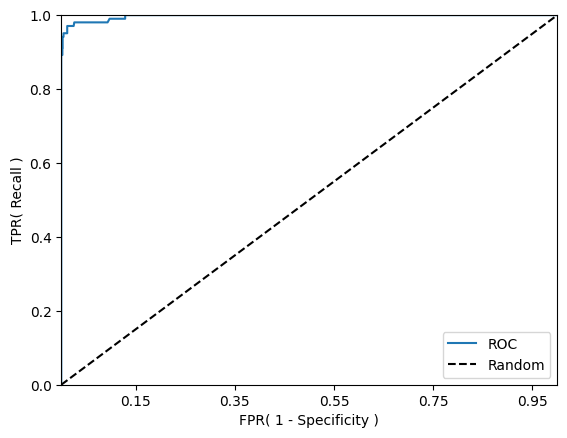

In [19]:
# xgb
pred_proba = xgb_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [20]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

ROC AUC: 0.7412


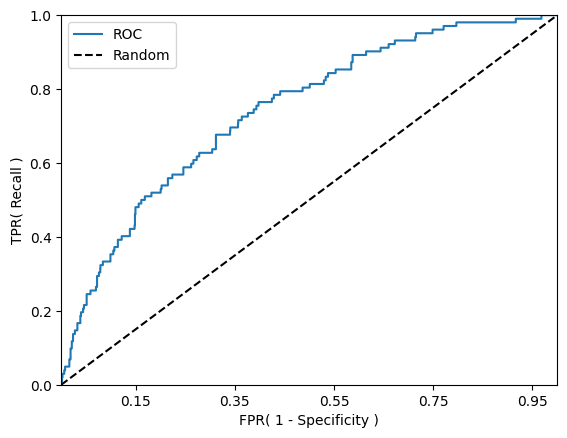

In [21]:
pred_proba = lr_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

lr_roc_score = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8716


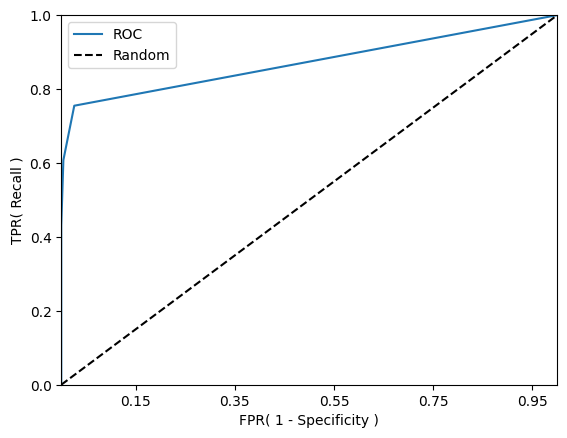

In [22]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train, y_train)

pred_proba = knn_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

knn_roc_score = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8814


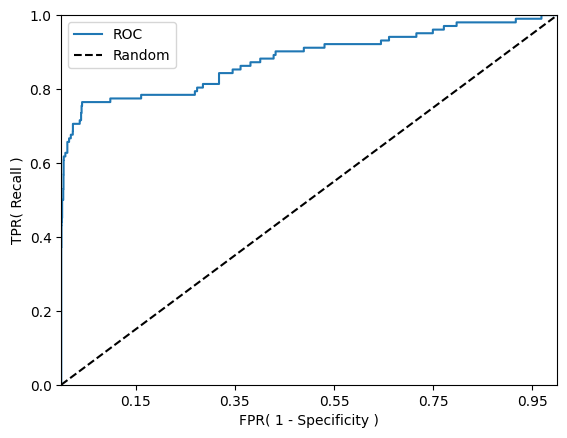

In [23]:
# 보팅 분류기(lr + knn)
from sklearn.ensemble import VotingClassifier

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')
vo_clf.fit(X_train, y_train)

pred_proba = vo_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

vo_roc_score = roc_auc_score(y_test, vo_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.9968


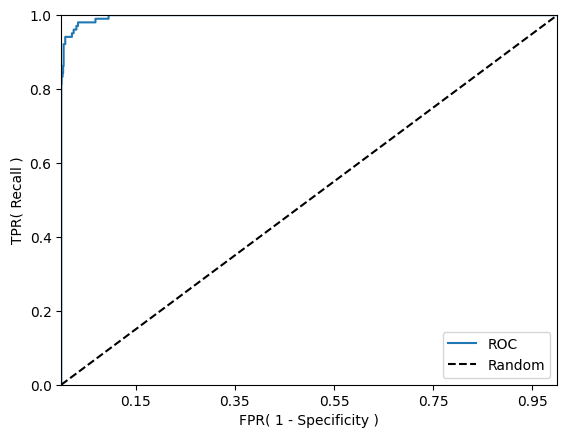

In [24]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)

pred_proba = rf_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

xgb_roc_score = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

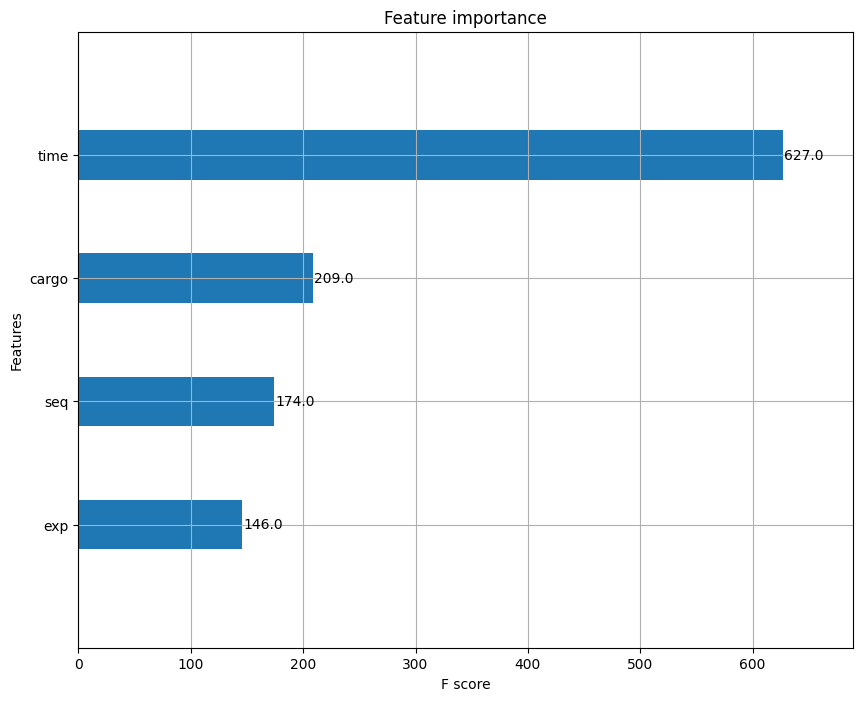

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [ ]:
from lightgbm import LGBMClassifier

#학습, 평가
lgbm_clf=LGBMClassifier(n_estimators=100, num_leaves=16,
                       n_jobs=-1, boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

[LightGBM] [Info] Number of positive: 437, number of negative: 15994
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 16431, number of used features: 4
오차 행렬
[[4006    0]
 [   0  102]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000


ROC AUC: 1.0000


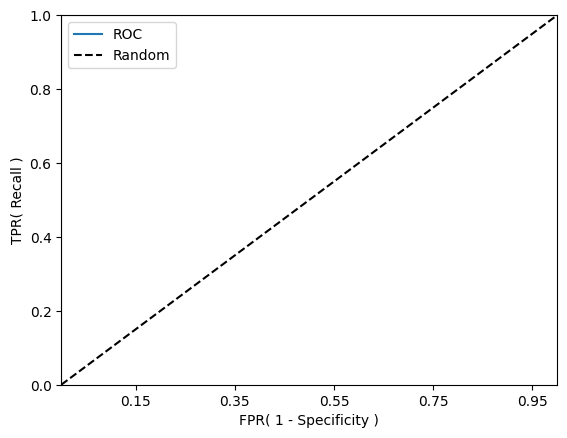

In [ ]:
pred_proba = lgbm_clf.predict_proba(X_test)
roc_curve_plot(y_test, pred_proba[:, 1])

xgb_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))